## Credit Card Lead Prediction - Problem Statement

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

1. Customer details (gender, age, region etc.)

2. Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## Table of Content

* __Step 1: Importing Required Libraries__
    
* __Step 2: Data Loading & Inspection__
    
* __Step 3: Data Wrangling__
    
* __Step 4: Exploratory Data Analysis (EDA)__
    
* __Step 5: Building Model__
    
* __Step 6: Predicting on Test Data and Generating submission file__

### Step 1: Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Loading & Inspection

In [2]:
# Loading Train and Test Datasets
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")

In [3]:
# Viewing the shape of the train and test datasets
train.shape,test.shape

((245725, 11), (105312, 10))

* __We have 2,45,725 rows and 11 columns in Train set whereas, Test set has 1,05,312 rows and 10 columns.__

In [4]:
# Viewing the Train dataset
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
# Viewing the Test dataset
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
# Viewing the datatypes of Train dataset
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [7]:
# Viewing the datatypes of Test dataset
test.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [8]:
# Finding the Ratio of null values in Train dataset
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [9]:
# Finding the Ratio of null values in Test dataset
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

* __We have 11.93% and 11.89% of missing values in Credit_Product column of Train data and Test data respectively.__

In [10]:
# Finding the number of categorical features in Train dataset
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

# Finding the number of numerical features in Train dataset
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [11]:
# Finding the number of categorical features in Test dataset
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

# Finding the number of numerical features in Test dataset
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


### Step 3: Data Wrangling

Missing Values:

The unwanted presence of missing values in the training data often reduces the accuracy of a model or leads to a biased model. It leads to inaccurate predictions. This is because we don’t analyse the behavior and relationship with other variables correctly. So, it is important to treat missing values well.

Missing values under 'Credit_Product' column have been put under seperate category during label encoding.

In [12]:
# Finding out the column(s) in which null values are available in the Train dataset
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

* __Credit_Product has 29,325 null values in the Train dataset.__

In [13]:
# Finding out the column(s) in which null values are available in the Test dataset
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

* __Credit_Product has 12,522 null values in the Test dataset.__

In [14]:
# Viewing the distinct values in 'Credit_Product' column of Train dataset
train['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

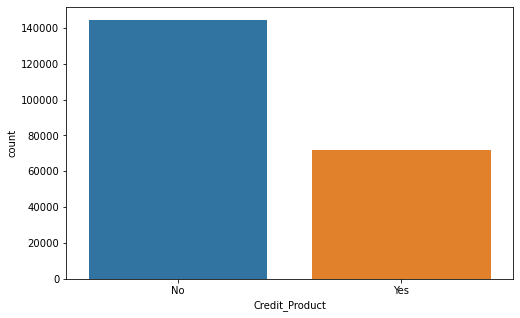

In [15]:
# Viewing the distinct values in 'Credit_Product' column of Train dataset through countplot
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=train)

In [16]:
# Viewing the distinct values in 'Credit_Product' column of Test dataset
test['Credit_Product'].value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

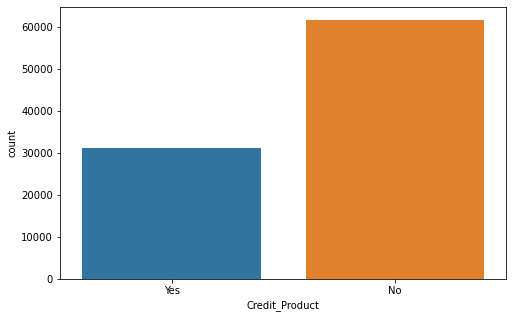

In [17]:
# Viewing the distinct values in 'Credit_Product' column of Test dataset through countplot
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product',data=test)

In [18]:
# Viewing missing values in Train and Test datasets
train['Credit_Product'].isnull().sum(),test['Credit_Product'].isnull().sum()

(29325, 12522)

### Step 4: Exploratory Data Analysis (EDA)

In [19]:
# Viewing the Columns of Train dataset
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [20]:
# Viewing the first 5 records of Train dataset
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [21]:
# Viewing the distinct values in 'Gender' column of Train dataset
train['Gender'].value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [22]:
# Viewing the distinct values in 'Region_Code' column of Train dataset
train['Region_Code'].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [23]:
# Viewing the distinct values in 'Occupation' column of Train dataset
train['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [24]:
# Viewing the distinct values in 'Channel_Code' column of Train dataset
train['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [25]:
# Viewing the distinct values in 'Vintage' column of Train dataset
train['Vintage'].value_counts()

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64

In [26]:
# Viewing the distinct values in 'Is_Active' column of Train dataset
train['Is_Active'].value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

__We see there are no irregularities in the data values of various columns.__

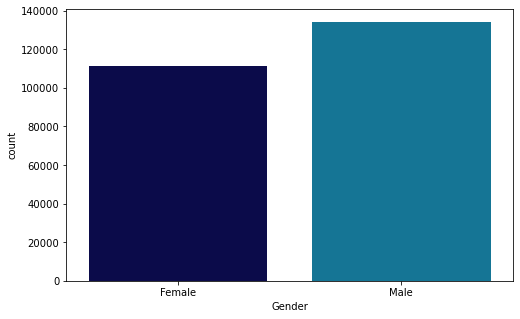

In [27]:
# Viewing the distinct values in 'Gender' column of Train dataset through countplot
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train,palette='ocean')

* __Male customers are more than Female customers.__

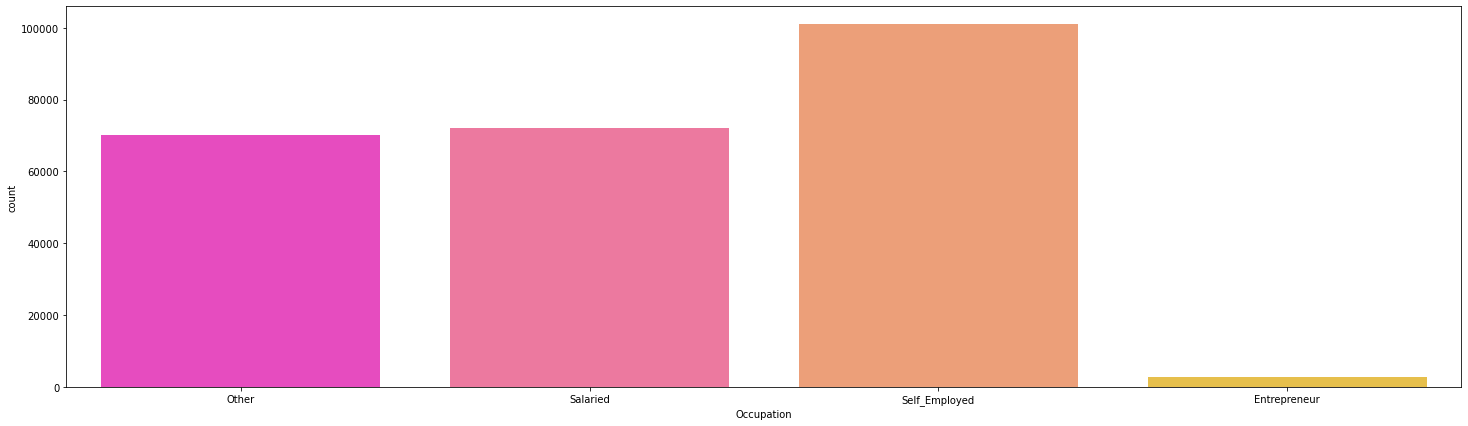

In [28]:
# Viewing the distinct values in 'Occupation' column of Train dataset through countplot
plt.figure(figsize=(25,7))
sns.countplot('Occupation',data=train,palette='spring')

* __Self-employed customers are more. Entrepreneurs are very less.__

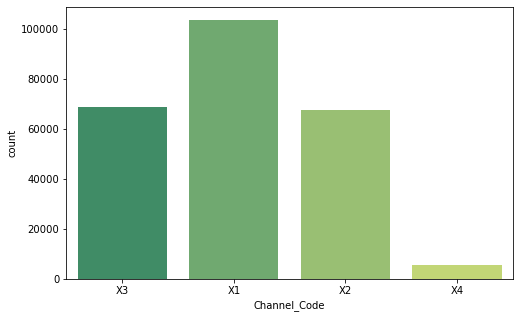

In [29]:
# Viewing the distinct values in 'Channel_Code' column of Train dataset through countplot
plt.figure(figsize=(8,5))
sns.countplot('Channel_Code',data=train,palette='summer')

* __X1 channel code is highest. X4 is the least.__

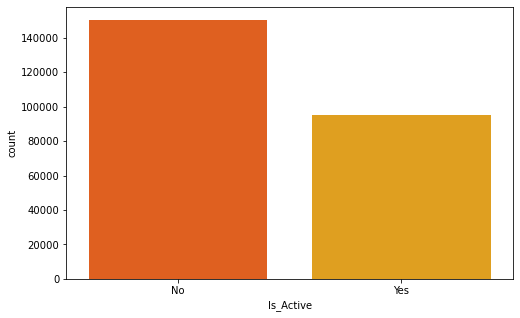

In [30]:
# Viewing the distinct values in 'Is_Active' column of Train dataset through countplot
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=train,palette='autumn')

* __There are more inactive customers than the active customers.__

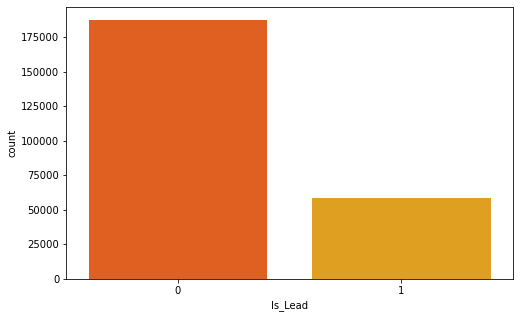

In [31]:
# Viewing the distinct values in label of 'Is_Lead' column of Train dataset through countplot
plt.figure(figsize=(8,5))
sns.countplot('Is_Lead',data=train,palette='autumn')

* __There are more customers who do not produce lead for credit card.__

In [32]:
# Importing Pandas Profiling Library
from pandas_profiling import ProfileReport

# Generating Pandas Profiling Report on Training data for Exploratory Data Analysis including finding out unique values
profreport = ProfileReport(train)
profreport.to_file(output_file='trainreport.html')

In [33]:
# Viewing the Profile Report within the jupyter notebook
profreport.to_notebook_iframe()

In [34]:
# Viewing the correlation among the variables of train dataset w.r.t. 'Is_Label'
train.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


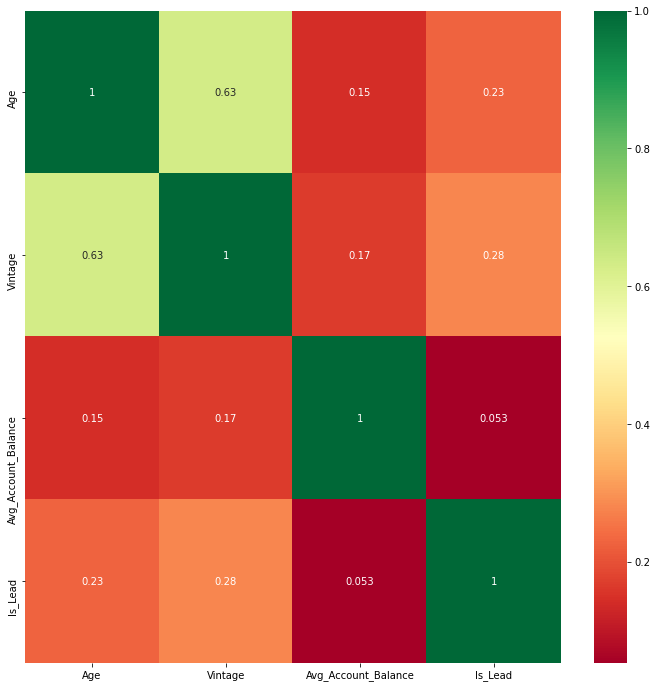

In [35]:
# Finding the correlation among various features

plt.figure(figsize = (12,12))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

### Step 5: Building Model

In [36]:
# Viewing the Train dataset
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [37]:
# Viewing the datatypes of Train dataset
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [38]:
# Chanding the type of 'Credit_Product'
train['Credit_Product']=train['Credit_Product'].astype(str)

In [39]:
# Viewing the info of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         245725 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [40]:
# Label Encoding of Fields in Train dataset
le_train = LabelEncoder()
 
train['Gender']= le_train.fit_transform(train['Gender'])
train['Occupation']= le_train.fit_transform(train['Occupation'])
train['Credit_Product']= le_train.fit_transform(train['Credit_Product'])
train['Vintage']= le_train.fit_transform(train['Vintage'])
train['Region_Code']= le_train.fit_transform(train['Region_Code'])
train['Channel_Code']= le_train.fit_transform(train['Channel_Code'])
train['Age']= le_train.fit_transform(train['Age'])
train['Is_Lead']= le_train.fit_transform(train['Is_Lead'])
train['Is_Active']= le_train.fit_transform(train['Is_Active'])
train['ID']= le_train.fit_transform(train['ID'])

* __Encoding the required columns from training dataset completed.__

In [41]:
# Viewing the columns of Train dataset
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [42]:
# Viewing the Train dataset after label encoding
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,179194,0,50,18,1,2,18,0,1045696,0,0
1,131013,0,7,27,2,0,13,0,581988,0,0
2,121520,0,33,18,3,2,10,0,1484315,1,0
3,57273,1,11,20,2,0,6,0,470454,0,0
4,209602,0,7,32,2,0,14,0,886787,0,0


In [43]:
# Viewing the datatypes of Train dataset after label encoding
train.dtypes

ID                     int32
Gender                 int32
Age                    int64
Region_Code            int32
Occupation             int32
Channel_Code           int32
Vintage                int64
Credit_Product         int32
Avg_Account_Balance    int64
Is_Active              int32
Is_Lead                int64
dtype: object

In [44]:
# Viewing if any missing values available in train dataset
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [45]:
# Viewing the distinct values and their count of 'Credit_Product' in train dataset
train['Credit_Product'].value_counts()

0    144357
1     72043
2     29325
Name: Credit_Product, dtype: int64

In [46]:
# Label Encoding of Fields in Test dataset
test['Credit_Product']=test['Credit_Product'].astype(str)

le_test = LabelEncoder()

test['Gender']= le_test.fit_transform(test['Gender'])
test['Occupation']= le_test.fit_transform(test['Occupation'])
test['Credit_Product']= le_test.fit_transform(test['Credit_Product'])
test['Vintage']= le_test.fit_transform(test['Vintage'])
test['Region_Code']= le_test.fit_transform(test['Region_Code'])
test['Channel_Code']= le_test.fit_transform(test['Channel_Code'])
test['Age']= le_test.fit_transform(test['Age'])
test['Is_Active']= le_test.fit_transform(test['Is_Active'])
test['ID']= le_test.fit_transform(test['ID'])
#test["Avg_Account_Balance"]=le_test.fit_transform(test["Avg_Account_Balance"])

In [47]:
# Viewing the Test dataset after label encoding
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,94233,1,5,4,1,0,9,1,742366,0
1,28747,1,19,18,1,1,21,2,925537,0
2,94883,1,7,20,2,0,4,0,215949,0
3,90941,1,5,22,1,0,14,0,868070,0
4,87803,0,5,20,1,0,6,0,657087,0


In [48]:
# Viewing the datatypes of Test dataset after label encoding
test.dtypes

ID                     int32
Gender                 int32
Age                    int64
Region_Code            int32
Occupation             int32
Channel_Code           int32
Vintage                int64
Credit_Product         int32
Avg_Account_Balance    int64
Is_Active              int32
dtype: object

#### Using Pycaret to find out the best classification model

In [49]:
# Import classification module from Pycaret 
from pycaret.classification import * 

In [50]:
# Setting up the environment for pycaret
reg1 = setup(train, target = 'Is_Lead', train_size = 0.8, session_id=156, log_experiment=True, experiment_name='CardLead')

Setup Succesfully Completed!


,Description,Value
0,session_id,156
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(245725, 11)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


2021/05/30 22:07:56 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [51]:
# Find out the best model based on AUC
best = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.8609,0.8735,0.5381,0.812,0.6472,0.5649,0.5835,1.905
1,Gradient Boosting Classifier,0.8604,0.8722,0.5318,0.8158,0.6438,0.5618,0.5817,51.09
2,CatBoost Classifier,0.8597,0.8721,0.5584,0.7887,0.6538,0.5691,0.5824,76.33
3,Extreme Gradient Boosting,0.8598,0.8718,0.5522,0.7939,0.6513,0.567,0.5817,16.95
4,Ada Boost Classifier,0.8561,0.8653,0.5046,0.8191,0.6245,0.5416,0.5659,13.76
5,Linear Discriminant Analysis,0.8508,0.857,0.4503,0.8505,0.5888,0.508,0.5464,1.007
6,Extra Trees Classifier,0.843,0.8443,0.5684,0.7119,0.6321,0.5339,0.5394,19.31
7,Random Forest Classifier,0.8458,0.8324,0.5469,0.7352,0.6272,0.5327,0.542,2.194
8,Decision Tree Classifier,0.7834,0.7071,0.562,0.542,0.5518,0.4091,0.4092,2.666
9,Naive Bayes,0.7597,0.6878,0.009,0.2949,0.0175,0.0033,0.0113,0.1296


* __Predictions using Light Gradient Boosting Machine are 86.09% accurate with highest AUC of 0.8735.__

In [52]:
# Create Light Gradient Boosting Model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8654,0.874,0.5473,0.8267,0.6586,0.579,0.5981
1,0.8605,0.8729,0.5348,0.8129,0.6452,0.5629,0.582
2,0.8595,0.8738,0.5276,0.8148,0.6405,0.5581,0.5784
3,0.8566,0.868,0.5246,0.8028,0.6345,0.5502,0.5694
4,0.8596,0.8732,0.5419,0.802,0.6468,0.5632,0.5801
5,0.8632,0.8748,0.5492,0.8133,0.6557,0.5742,0.5915
6,0.864,0.8765,0.5396,0.8268,0.653,0.573,0.5932
7,0.8597,0.8742,0.5439,0.8008,0.6478,0.5641,0.5806
8,0.8593,0.869,0.5291,0.8126,0.6409,0.5582,0.5781
9,0.8608,0.8784,0.5428,0.8071,0.6491,0.5663,0.5837


In [53]:
# Predict on lightgbm
pred_lightgbm = predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8597,0.8759,0.5347,0.8093,0.6439,0.5611,0.5797


In [54]:
# Finalize a lightgbm model
lightgbm_final = finalize_model(lightgbm)

### Step 6: Predicting on the Test Data and Generating submission file

In [55]:
# Generate predictions on the Test dataset
test_pred = predict_model(lightgbm_final, data = test)

In [56]:
# Viewing the predicted values ('Label' & 'Score') on the Test dataset
test_pred

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Label,Score
0,94233,1,5,4,1,0,9,1,742366,0,0,0.0425
1,28747,1,19,18,1,1,21,2,925537,0,1,0.8737
2,94883,1,7,20,2,0,4,0,215949,0,0,0.0650
3,90941,1,5,22,1,0,14,0,868070,0,0,0.0218
4,87803,0,5,20,1,0,6,0,657087,0,0,0.0219
...,...,...,...,...,...,...,...,...,...,...,...,...
105307,33196,1,28,18,2,1,40,1,4242558,1,1,0.9882
105308,31821,1,31,27,1,1,40,1,1159153,0,1,0.5375
105309,52132,1,11,4,2,3,5,0,1703727,0,0,0.0716
105310,1477,1,29,4,1,2,44,0,737178,1,0,0.2112


In [57]:
# Reading the submission file
submission = pd.read_csv('sample_submission_eyYijxG.csv')

# Assigning the predicted scores to 'Is_Lead' column of submission dataset
submission['Is_Lead'] = test_pred['Score']

# Writing the submission dataset output to the csv file
submission.to_csv('CreditCardLeadPredict_lightgbm_final.csv', index=False)

### End